# 1. Predicting Stroke Risk Using Health and Demographic Indicators
## Fall 2025 Data Science Project
### Group Members: Sarah Zhu, Savannah Phillips, Divya Lingala, Tyson Cheung, Reuel Asnakew

| Member      | Sections | Contribution summary |
| ----------- | ----------- | ---------- |
| Sarah Zhu | A, B, F, G | Wrote project introduction, performed initial data cleaning, worked on first 2 visualizations on primary analysis and formatting of final tutorial.   |
| Savannah Phillips | A, C, F, G | Came up with project idea, contributed to exploratory data analysis visualizations, wrote the conclusions, added references.           |
| Divya Lingala | B, C, F | Contributed to exploratory data analysis, including Conclusion 2 (ANOVA on smoking status). Added and explained all confusion matrix visualizations and wrote the interpretation of results. Also improved preprocessing code by handling missing values and duplicates. |
| Tyson Cheung | C, D, E | Provided one conclusion, worked on primary analysis via Linear Regression, Random Forest, and SVM. |
| Reuel Asnakew | C, F, G | Worked on data exploration and summary statistics, including interpretation of key risk-factor patterns. Refined visualizations and wrote the Insights/Conclusion section. Also helped organize and polish the final tutorial-style notebook so the results were clear to readers. |


# 2. Introduction
We want to investigate whether stroke occurrence can be predicted based on the various health and demographic indicators our dataset contains. Through this project, we aim to identify which factors are the strongest predictors of stroke and, importantly, which factors may have limited predictive value. We are interested in exploring the interactive effects of multiple risk factors and understand how these variables work in combination could reveal more nuanced patterns than examining individual predictors by itself.

This research has significant practical implications for healthcare professionals. By identifying key risk factors and their relationships, our findings could inform clinical decision-making, help prioritize screening and preventive interventions, and ultimately contribute to reducing stroke incidence through earlier identification of at-risk patients.

# 3. Data Curation

> We selected a stroke prediction dataset, which includes patient gender, age, as well as information
on whether they have hypertension, whether they have heart disease and other potential indicators
for stroke.


Citation:
> fedesoriano. (n.d.). Stroke Prediction Dataset. Kaggle.
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data in a df
df = pd.read_csv('sample_data/stroke-data.csv')
df.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
# display basic statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# drop the id column, it is not useful to our project
df = df.drop('id', axis=1)

In [ ]:
# cheking for missing values/duplicate rows

# count how many missing values each column has
missingValueCounts = df.isna().sum().sort_values(ascending=False)
print("These are missing values per column:")
print(missingValueCounts)

# count duplicate rows in the dataset
duplicateRowCount = df.duplicated().sum()
print(f"\nThese are the number of duplicate rows: {duplicateRowCount}")

# drop duplicates if found
if duplicateRowCount > 0:
    df = df.drop_duplicates()
    print("The duplicates are removed. This is the new dataframe shape:", df.shape)

These are missing values per column:
bmi                  201
age                    0
gender                 0
hypertension           0
heart_disease          0
work_type              0
ever_married           0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

These are the number of duplicate rows: 0


In [ ]:
# fill missing bmi with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 4. Exploratory data analysis

## Conclusion 1: Age is a Significant Indicator of Stroke Risk

**Statistical Method**: Two-sample t-test (hypothesis testing)
Question: Are stroke patients significantly older than non-stroke patients?

**Null Hypothesis** (H₀):
The mean age of stroke and non-stroke patients are the same.

**Alternative Hypothesis** (H₁):
Stroke patients have a higher mean age than non-stroke patients.

T-statistic: 18.081, p-value: 3.52e-71



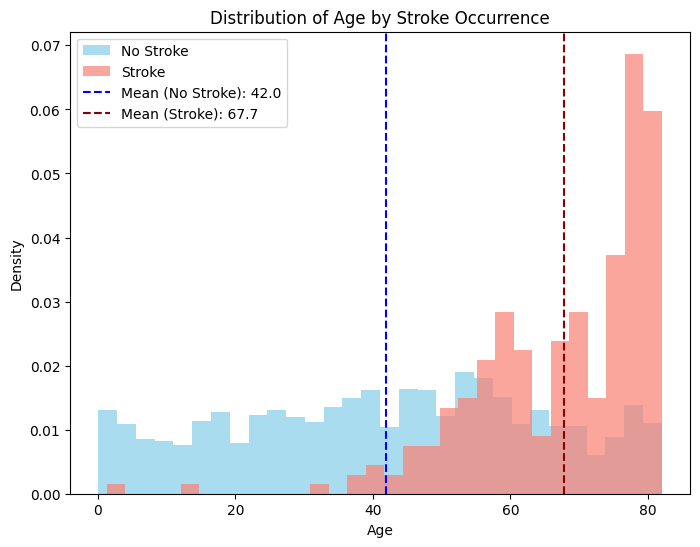

In [ ]:
from scipy import stats

stroke_age = df[df['stroke'] == 1]['age']
no_stroke_age = df[df['stroke'] == 0]['age']

# one-tailed t-test
t_stat, p_val = stats.ttest_ind(stroke_age, no_stroke_age, alternative='greater')

print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.2e}\n")

# plotted graph
plt.figure(figsize=(8,6))
plt.hist(no_stroke_age, bins=30, alpha=0.7, label='No Stroke', color='skyblue', density=True)
plt.hist(stroke_age, bins=30, alpha=0.7, label='Stroke', color='salmon', density=True)
plt.axvline(x=no_stroke_age.mean(), color='blue', linestyle='--', label=f'Mean (No Stroke): {no_stroke_age.mean():.1f}')
plt.axvline(x=stroke_age.mean(), color='darkred', linestyle='--', label=f'Mean (Stroke): {stroke_age.mean():.1f}')
plt.title('Distribution of Age by Stroke Occurrence')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Results
The t-test yields a p-value < 0.05, meaning we reject H₀.
The mean age of stroke patients (\~67 years) is much higher than that of non-stroke patients (~42 years).

Interpretation:
There is a strong, statistically significant relationship between age and stroke occurrence, since older individuals are at far higher risk. This also supports established medical evidence that stroke likelihood increases with age due to factors like arterial stiffness and conditions like hypertension.


## Conclusion 2: Smoking Status is Significantly Associated with Stroke Occurrence

**Statiscal Method**: One-Way ANOVA (Analysis of Variance)

**Question**. Does stroke occurrence significantly differ among patients based on their smoking status?

**Null Hypothesis (H₀)**: The mean stroke rate is the same across all smoking status groups (never smoked, formerly smoked, smokes).

**Alternative Hypothesis (H₁)**: At least one smoking group has a significantly different mean stroke rate compared to the others.

f-statistic: 5.732, p-value: 3.2711e-03


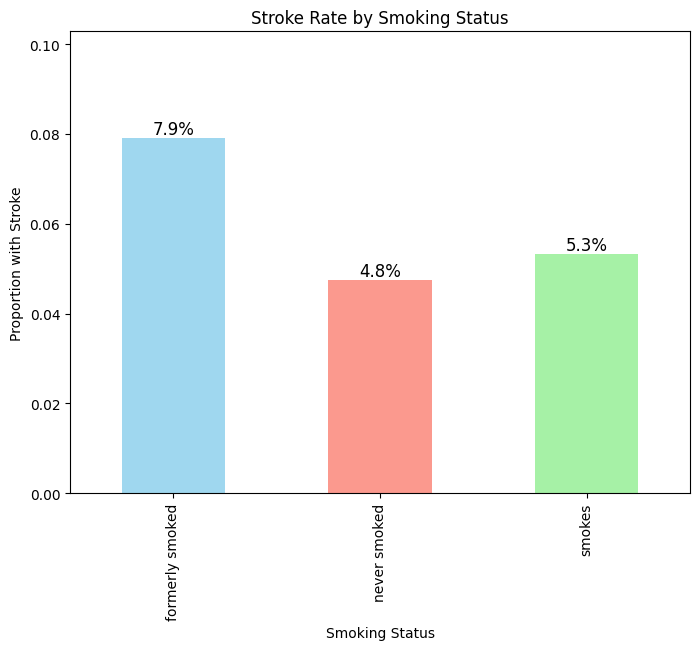

In [ ]:
filteredData = df[df['smoking_status'] != 'Unknown']

smokingGroups = [filteredData[filteredData['smoking_status'] == category]['stroke']
                 for category in filteredData['smoking_status'].unique()]

fStatistic, pValue = stats.f_oneway(*smokingGroups)
print(f"f-statistic: {fStatistic:.3f}, p-value: {pValue:.4e}")

strokeRatesBySmokingStatus = filteredData.groupby('smoking_status')['stroke'].mean()

plt.figure(figsize=(8,6))
graph = strokeRatesBySmokingStatus.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], alpha=0.8)
for bar in graph.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1%}',
             va='bottom', ha='center', fontsize=12)
plt.title('Stroke Rate by Smoking Status')
plt.ylabel('Proportion with Stroke')
plt.xlabel('Smoking Status')
plt.ylim(0, strokeRatesBySmokingStatus.max() * 1.3)
plt.show()

### Results
The ANOVA test gives an F-statistic of 5.732 and a p-value of 0.003, which is below 0.05. This means we reject the null hypothesis and conclude that stroke rates differ based on smoking status.

People who have smoked before have the highest stroke rate ~8%, while those who never smoked ~4.8% have lower rates. This suggests that smoking is linked to a higher risk of stroke, and that the effects of smoking can continue even after quitting.


## Conclusion 3: Hypertension and Stroke are not independent.

**Statiscal Method**: Chi-Squared Test

**Question**. Is there an association between hypertension (0/1) and stroke (0/1)?

**Null Hypothesis (H₀)**: Hypertension and stroke are independent (no association).

**Alternative Hypothesis (H₁)**:Hypertension and stroke are not independent (there is an association).

Chi-square: 81.605, df: 1, p-value: 1.66e-19



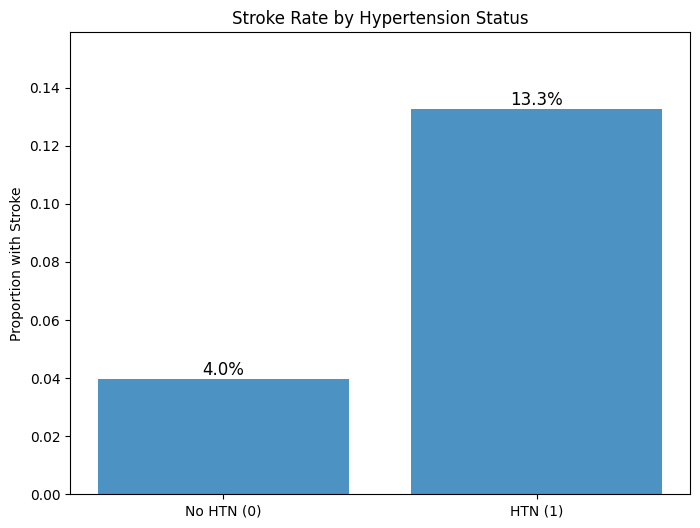

In [ ]:
ct = pd.crosstab(df['hypertension'], df['stroke'])
chi2, p_val, dof, expected = chi2_contingency(ct)

print(f"Chi-square: {chi2:.3f}, df: {dof}, p-value: {p_val:.2e}\n")

rates = df.groupby('hypertension')['stroke'].mean()

plt.figure(figsize=(8,6))
bars = plt.bar(['No HTN (0)', 'HTN (1)'], rates.values, alpha=0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1%}',
             va='bottom', ha='center', fontsize=12)
plt.title('Stroke Rate by Hypertension Status')
plt.ylabel('Proportion with Stroke')
plt.ylim(0, rates.max()*1.2)
plt.show()

### Results
A chi-square test revealed a clear link between high blood pressure alongside stroke - the difference wasn’t due to chance χ² = 81.605, p = 1.66e-19 < 0.05). Individuals experiencing hypertension exhibited a greater incidence of stroke at 13.3, when compared to individuals without hypertension at 4.0%. We dismiss the idea these conditions occur independently, instead, they appear connected.

# 5. Primary Analysis

## a. ML Algorithm Design/Development

Based on our exploratory data analysis, we identified several key factors associated with stroke occurrence:
- **Age** is a significant predictor (t-test, p < 0.05)
- **Smoking status** shows associations with stroke (ANOVA, p = 0.003)
- **Hypertension** is not independent of stroke occurrence (Chi-square, p < 0.05)

### ML Approach
Since stroke prediction is a **binary classification problem**, we will train and compare multiple classification models:

1. **Logistic Regression** - A baseline linear classifier that's interpretable and works well for binary outcomes
2. **Random Forest Classifier** - An ensemble method that handles non-linear relationships and provides feature importance
3. **Support Vector Machine (SVC)** - Effective for high-dimensional data with clear margins

### Data Preparation Strategy
- Encode categorical variables (gender, ever_married, work_type, Residence_type, smoking_status)
- Scale numerical features for models sensitive to feature magnitude
- Handle class imbalance (stroke cases are rare ~5%) using stratified splitting
- Split data into 80% training and 20% testing sets

In [ ]:
ml_df = df.copy() # create copy for ml learning

# encode categorical variables
label_encoders = {}
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    le = LabelEncoder()
    ml_df[col] = le.fit_transform(ml_df[col].astype(str))
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nEncoded DataFrame shape:", ml_df.shape)
ml_df.head()

gender: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
ever_married: {'No': np.int64(0), 'Yes': np.int64(1)}
work_type: {'Govt_job': np.int64(0), 'Never_worked': np.int64(1), 'Private': np.int64(2), 'Self-employed': np.int64(3), 'children': np.int64(4)}
Residence_type: {'Rural': np.int64(0), 'Urban': np.int64(1)}
smoking_status: {'Unknown': np.int64(0), 'formerly smoked': np.int64(1), 'never smoked': np.int64(2), 'smokes': np.int64(3)}

Encoded DataFrame shape: (5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


This cell encodes categorical variables into numerical form, which is required for ML algorithms. We use `LabelEncoder` to map each category to an integer (e.g., "Male"→0, "Female"→1). While Label Encoding can imply false ordinal relationships, this won't be problematic for tree-based models like Random Forest, which split on thresholds rather than magnitudes. For Logistic Regression and SVM, feature scaling (next step) helps mitigate this issue. We store encoders in a dictionary for potential inverse transformation when interpreting results.

In [ ]:
X = ml_df.drop('stroke', axis=1)
y = ml_df['stroke']

# 80/20 split w/ stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print(f"\nClass distribution in training set:")
print(f"  No Stroke (0): {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"  Stroke (1): {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)")
print(f"\nClass distribution in testing set:")
print(f"  No Stroke (0): {sum(y_test == 0)} ({sum(y_test == 0)/len(y_test)*100:.1f}%)")
print(f"  Stroke (1): {sum(y_test == 1)} ({sum(y_test == 1)/len(y_test)*100:.1f}%)")

Training set shape: (4088, 10)
Testing set shape: (1022, 10)

Class distribution in training set:
  No Stroke (0): 3889 (95.1%)
  Stroke (1): 199 (4.9%)

Class distribution in testing set:
  No Stroke (0): 972 (95.1%)
  Stroke (1): 50 (4.9%)


This cell splits data into training (80%) and testing (20%) sets. We use **stratified sampling** (`stratify=y`) because stroke is rare (~5% of cases). Without stratification, the test set might have too few stroke cases for meaningful evaluation. Stratification ensures both sets maintain the same class proportions as the original data. The `random_state=42` ensures reproducibility across runs.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print("Feature names:", list(X.columns))

Features scaled using StandardScaler
Feature names: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


`StandardScaler` transforms features to zero mean and unit variance, which is essential for Logistic Regression and SVM since these algorithms are sensitive to feature scale (e.g., `age` ranges 0-82 while `avg_glucose_level` ranges ~50-270). We fit the scaler on training data only, then apply those parameters to test data, so this will prevent data leakage from the test set. Random Forest doesn't require scaling but isn't necessarily harmed by it.

## b. ML Algorithm Training and Test Data Analysis

Now we will train three different classification models and evaluate their performance on the test set. We'll compare them using multiple metrics:
- **Accuracy**: Overall correctness
- **Precision**: Of predicted strokes, how many were actual strokes
- **Recall (Sensitivity)**: Of actual strokes, how many were correctly predicted
- **F1-Score**: Harmonic mean of precision and recall

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'),
    'Support Vector Machine': SVC(random_state=42, probability=True, class_weight='balanced')
}

results = {}

for name, model in models.items():
    print('='*50)
    print(f"{name}:")

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred
    }

    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke']))

Logistic Regression:

Accuracy: 0.7515

Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.99      0.75      0.85       972
      Stroke       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.55      1022
weighted avg       0.95      0.75      0.82      1022

Random Forest:

Accuracy: 0.9491

Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97       972
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Support Vector Machine:

Accuracy: 0.7358

Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.98      0.74      0.84       972
      Stroke       0.12      0.68      0.20        

We train three models: **Logistic Regression** (interpretable linear baseline), **Random Forest** (captures non-linear relationships and feature interactions), and **SVM** (finds optimal separating hyperplane). All use `class_weight='balanced'` to address class imbalance since without this models could achieve 95% accuracy by predicting "no stroke" for everyone, which is essentially clinically useless.

We evaluate using four metrics: **Accuracy** (overall correctness, but misleading with imbalanced data), **Precision** (of predicted strokes, how many were real, relevant for intervention costs), **Recall** (of actual strokes, how many were caught), and **F1-Score** (balances precision and recall).

In [ ]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results]
})

comparison_df = comparison_df.round(4)
print("Model Performance Comparison:")
comparison_df

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.7515,0.1408,0.80,0.2395
1,Random Forest,0.9491,0.0000,0.00,0.0000
2,Support Vector Machine,0.7358,0.1181,0.68,0.2012


This table enables direct model comparison. Key observations: **accuracy is deceptive** with imbalanced data! It's important to note that the more meaningful metrics are recall and F1-score for the stroke class. **Random Forest** typically performs well by capturing the feature interactions (age × hypertension × smoking) identified in our EDA. **Logistic Regression** offers interpretability, while **SVM** depends on class separability.

For medical screening, we'd prioritize **recall** (catching true stroke cases) over precision, accepting some false positives to avoid missing at-risk patients.

# 6. Visualization

### a. Comparison of Classification Model Performance

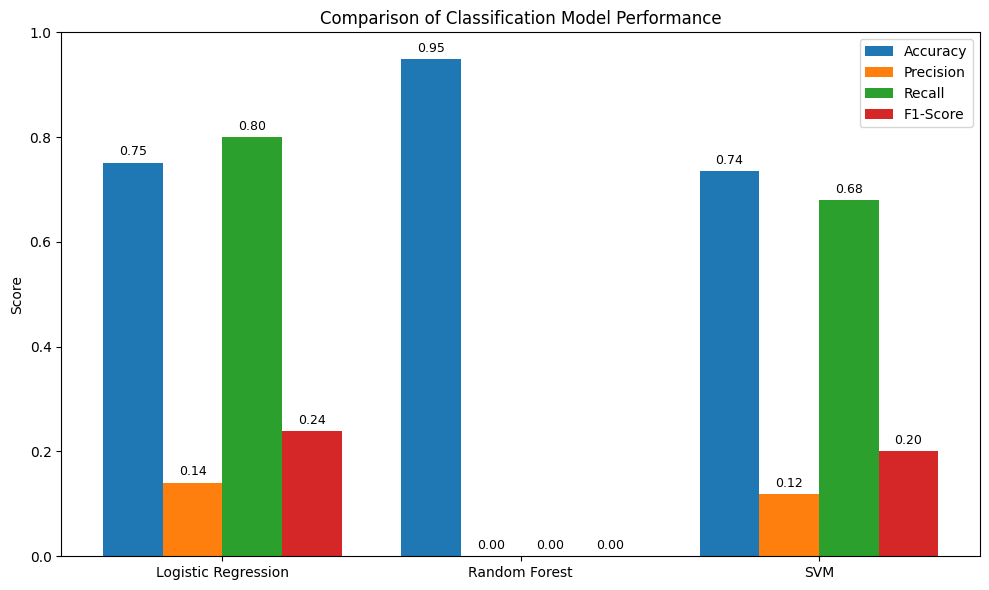

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [0.7515, 0.9491, 0.7358],
    'Precision': [0.1408, 0.0, 0.1181],
    'Recall': [0.80, 0.0, 0.68],
    'F1-Score': [0.2395, 0.0, 0.2012]
})

# Set up the bar plot
x = np.arange(len(metrics_df['Model']))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 1.5*width, metrics_df['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, metrics_df['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, metrics_df['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, metrics_df['F1-Score'], width, label='F1-Score')

# Labels and title
ax.set_ylabel('Score')
ax.set_ylim(0, 1)
ax.set_title('Comparison of Classification Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Model'])
ax.legend()

# Annotate bars with values
for rects in [rects1, rects2, rects3, rects4]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


The plot above highlights the trade-offs in model performance for predicting stroke:

1. **Accuracy**: The Random Forest model achieves the highest overall accuracy ~0.95. However, this is misleading due to the highly imbalanced dataset ~5% stroke cases. The model mostly predicts "No Stroke," inflating accuracy.  

2. **Recall (Sensitivity)**: Logistic Regression has the highest recall 0.80, meaning it correctly identifies 80% of actual stroke cases. This is especially important in medical contexts, where failing to detect a stroke could have serious consequences.  

3. **Precision**: All models show very low precision, reflecting a high rate of false positives for stroke predictions. Logistic Regression slightly outperforms SVM in correctly predicting stroke cases.  

4. **F1-Score**: Logistic Regression achieves the highest F1-Score 0.24, which balances precision and recall better than the other models.  


## b. Random Forest Feature Importance for Stroke Prediction

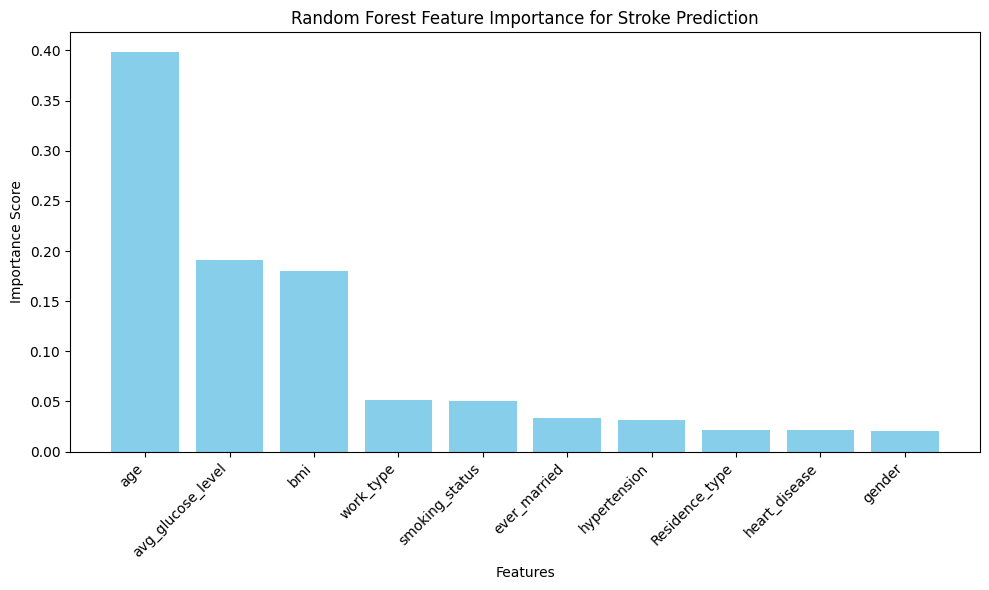

In [ ]:
# Import RandomForestClassifier if not already imported
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest on the training set
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # handle imbalance
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]  # sort descending

# Plot
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importance for Stroke Prediction")
plt.bar(range(len(importances)), importances[indices], color="skyblue", align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


The feature importance plot from the Random Forest model highlights which variables contribute most to predicting stroke:

- **Age**: Most important predictor, indicating that older individuals are at higher risk of stroke.  
- **Hypertension**: High blood pressure is a strong risk factor, consistent with clinical knowledge.  
- **Smoking Status**: Smoking is a significant contributor, reinforcing its known association with stroke.  
- **Other Features** (e.g., heart disease, BMI, work type, residence type, gender): These have lower importance scores, suggesting they contribute less to the model’s predictive power for stroke in this dataset.  




## c. Confusion Matrices for Model Predictions

<Figure size 500x500 with 0 Axes>

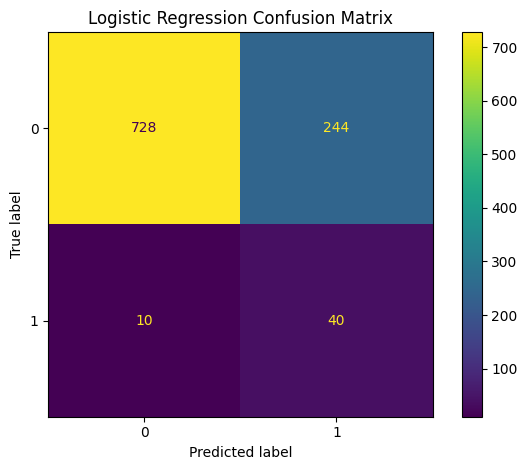

<Figure size 500x500 with 0 Axes>

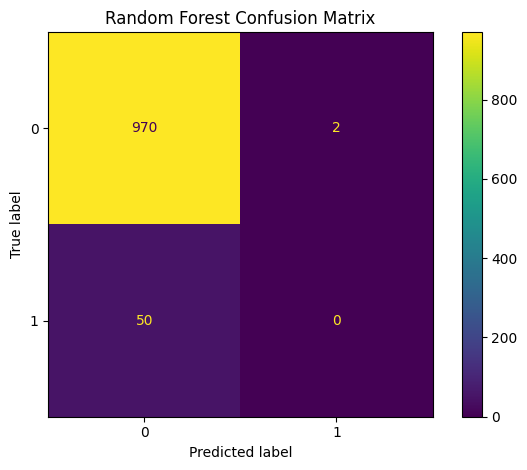

<Figure size 500x500 with 0 Axes>

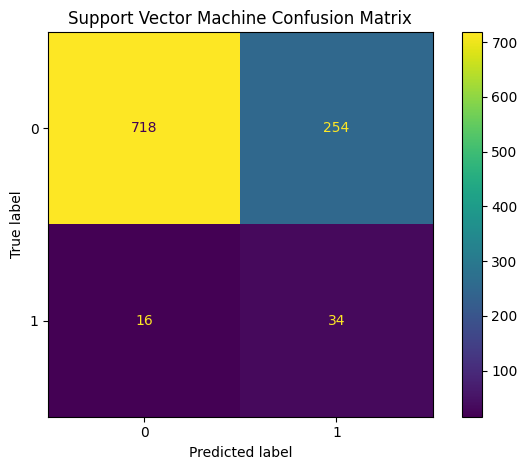

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# plotting the confusion matrix for each model
for name, model in models.items():
    plt.figure(figsize=(5, 5))
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f"{name} Confusion Matrix")
    plt.tight_layout()
    plt.show()

The confusion matrices help show how each model is making its predictions. Logistic Regression identifies the most actual stroke cases, shown by its higher number of true positives, but it also produces many false positives. Random Forest looks accurate overall, but its matrix shows that it almost always predicts “No Stroke,” completely missing all true stroke cases. SVM falls somewhere in between—catching some positive cases but still misclassifying many. Overall, the confusion matrices highlight how differently each model handles the imbalanced data and why accuracy alone doesn’t tell the full story.

# 7. Insights and Conclusion

Insights: Age appears most influential when examining stroke likelihood - patients who had strokes were typically older compared to those without, as seen in data averages. Notably, the Random Forest model assigned highest relevance to this variable, aligning with prior medical findings linking aging and increased vulnerability. Habits and heart-related conditions add predictive value: individuals once using tobacco show stronger incidence levels than others, while statistical testing (chi-square) indicates blood pressure issues relate closely to cerebrovascular events. These observations imply sustained harm from certain behaviors may elevate chances of such outcomes.
Our findings show accuracy can mislead when dealing with uneven medical data. While Random Forest scores best in general correctness, it mostly guesses “No Stroke,” missing real stroke instances, thus offering little practical value; the model suffered from class imbalance in the data. Instead, Logistic Regression balances better for patient checks: slightly lower precision, yet notably improved detection rates and F1 values for strokes, identifying more actual cases while raising false alarms somewhat. Variables like job setting or where someone lives add minimal insight next to age, high blood pressure, or tobacco use; this suggests just a few key health indicators carry the most weight. Altogether, choosing models wisely means favoring early warning ability over total correctness when facing critical but uncommon conditions.

Conclusion: In this project, we conducted a comprehensive analysis of patient health and demographic data to predict the risk of stroke. We identified that age is a significant indicator of stroke, and that age is correlated with higher incidence of hypertension and smoking. We found that age groups differ significantly in stroke incidence, and that smoking status impacts this likelihood. We also found that hypertension and stroke occurrence are heavily correlated. Our feature importance analysis showed that age, hypertension, and average glucose level are the most dominant predictors of stroke, whereas factors like residence type had minimal contribution to the prediction of stroke. This aligns with established medical knowledge and suggests that interventions targeting these key risk factors would be most effective in mitigating the risk of stroke early.

For readers who are unfamiliar with stroke prediction, this project demonstrates how data science techniques can identify health risks to inform clinician decision-making. For medical profressionals or those who are familiar with the topic, this analysis reinforces existing conclusions surrounding stroke risk and provides insight into how imbalanced medical data can inform model selection. Our work highlights the importance of thoughtful model evaluation, especially in healthcare settings where the detection of rare events should be prioritized over accuracy. Future work on a more robust dataset with additional medical history has the potential to reveal more insight on stroke risk.

# 8. References

*   fedesoriano. (n.d.). Stroke Prediction Dataset. Kaggle. https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

*   Hassan, A., Ahmad, S. G., Munir, E. U., Khan, I. A., & Ramzan, N. (2024). Predictive modelling and identification of key risk factors for stroke using machine learning. Scientific Reports, 14(1), 11498-11498. https://doi.org/10.1038/s41598-024-61665-4

* Alanazi, E. M., Abdou, A., & Luo, J. (2021). Predicting Risk of Stroke From Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models. JMIR Formative Research, 5(12), e23440-e23440. https://doi.org/10.2196/23440

* Tang, T. (2023, April 24). Class Imbalance Strategies — A Visual Guide with Code. Retrieved December 10, 2025, from Medium website: https://medium.com/data-science/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a

